In [49]:
import pandas as pd

In [50]:
import numpy as np

In [51]:
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

In [53]:
import re

In [54]:
from bs4 import BeautifulSoup as bs

In [55]:
import requests

## Motivation

_The datasets that we will be examining for our analyses are congressional term data and crime/death/homicide rates by state. My motivation for this analysis is to find a correlation between congressional terms and crime/death/homicide rates in the respective states. My preliminary assessment is that there is a correlation between the two._

_Our first dataset, "Congress Age," lists term data for congressional incumbents between January 1947 and February 2014. This house membership data is from the @unitedstates project (https://theunitedstates.io/)._

_The second dataset, "Crime Rate by State," details state-wise homicide rates, firearms death rates, and total firearm deaths. The data provided in this dataset was collected and published by Statista Research Department (https://www.statista.com/statistics/301549/us-crimes-committed-state/)._ 


In [56]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congress-terms.csv'

In [57]:
congress_df = pd.read_csv(url)

In [58]:
congress_df.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3


__Transformation (1):__ First, we need to reformat and do away with the 'birthday' column. I simply stripped the year out of the birthday entry and created a new "birthyear" column. This makes it easy to do simple year-by-year calculations. Next, since the dataset is so large, I only wanted to consider members of the 113th Congress.

In [59]:
congress_df_modify = congress_df['birthday'].apply(lambda x: x.split('-'))

In [60]:
congress_df['birthyear'] = congress_df_modify.apply(lambda x: x[0])

In [61]:
congress_df.drop('birthday', axis=1).head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,state,party,incumbent,termstart,age,birthyear
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,TX,D,Yes,1947-01-03,85.9,1861
1,80,house,D000448,Robert,Lee,Doughton,NaN,NC,D,Yes,1947-01-03,83.2,1863
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,IL,D,Yes,1947-01-03,80.7,1866
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,NJ,R,Yes,1947-01-03,78.8,1868
4,80,house,L000296,William,NaN,Lewis,NaN,KY,R,No,1947-01-03,78.3,1868


In [62]:
congress_df = congress_df.loc[congress_df['congress'].isin([113])]

In [63]:
congress_df.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,birthyear
18091,113,house,H000067,Ralph,M.,Hall,NaN,1923-05-03,TX,R,Yes,2013-01-03,89.7,1923
18092,113,house,D000355,John,D.,Dingell,NaN,1926-07-08,MI,D,Yes,2013-01-03,86.5,1926
18093,113,house,C000714,John,NaN,Conyers,Jr.,1929-05-16,MI,D,Yes,2013-01-03,83.6,1929
18094,113,house,S000480,Louise,McIntosh,Slaughter,NaN,1929-08-14,NY,D,Yes,2013-01-03,83.4,1929
18095,113,house,R000053,Charles,B.,Rangel,NaN,1930-06-11,NY,D,Yes,2013-01-03,82.6,1930


__Transformation (2):__ For our second dataset, I used BeautifulSoup and grabbeed and parsed the raw HTML from a table. I was able to do this by searching for "<td\>" elements. Once I found these entries, I looped through the data and converted it to text. Then, I had to do a second loop and restructure the data, because much of it wasn't returning in the correct order. Finally, I replaced state names with their abbreviations. (This took a while, admittedly.)

In [64]:
webpage = requests.get('https://worldpopulationreview.com/state-rankings/crime-rate-by-state')

In [65]:
content = webpage.content

In [66]:
soup = bs(content,'html.parser')

In [67]:
dump = soup.find_all('td')

In [68]:
t = [e.text for e in dump]

In [69]:
n = [[t[i], t[i+1], t[i+2], t[i+3]] for i in range(0,len(t),4)]

In [70]:
crime_df = pd.DataFrame(n,columns=['state', 'h-rate', 'fa-death rate', 'total fa-deaths'])

In [71]:
crime_df.head()

,state,h-rate,fa-death rate,total fa-deaths
0,Louisiana,12.4,21.3,987
1,Missouri,9.8,19,1144
2,Nevada,9.1,16.8,498
3,Maryland,9,11.9,707
4,Arkansas,8.6,17.8,541


In [72]:
crime_df.replace(to_replace={'state':{
    'Louisiana':'LA','Missouri':'MS','Nevada' : 'NV','Maryland' : 'MD','Arkansas' : 'AR',
    'Alaska' : 'AK','Alabama' : 'AL','Mississippi' : 'MS','Tennessee' : 'TN', 'South Carolina' : 'SC',
    'Illinois' : 'IL','New Mexico' : 'NM','Georgia' : 'GA','Oklahoma' : 'OK','Ohio' : 'OH',
    'Indiana' : 'IN','Kentucky' : 'KY','Arizona' : 'AZ','Pennsylvania' : 'PA','North Carolina' : 'NC',
    'Michigan' : 'MI','Delaware' : 'DE','Kansas' : 'KS','Virginia' : 'VA','Texas' : 'TX',
    'Florida' : 'FL','West Virginia' : 'WV','California' : 'CA','Montana' : 'MT','Colorado' : 'CO',
    'New Jersey' : 'NJ','Iowa' : 'IA','Wisconsin' : 'WI','Washington' : 'WA','South Dakota' : 'SD',
    'New York' : 'NY','Connecticut' : 'CT','Hawaii' : 'HI','Wyoming' : 'WY','Oregon' : 'OR',
    'Massachusetts' : 'MA','Utah' : 'UT','Vermont' : 'VT','Nebraska' : 'NE','Minnesota' : 'MN',
    'Rhode Island' : 'RI','Idaho' : 'ID','Maine' : 'ME','North Dakota' : 'ND','New Hampshire' : 'NH'  
}}, inplace = True)

In [73]:
crime_df.head()

,state,h-rate,fa-death rate,total fa-deaths
0,LA,12.4,21.3,987
1,MS,9.8,19,1144
2,NV,9.1,16.8,498
3,MD,9,11.9,707
4,AR,8.6,17.8,541


In [80]:
plt.figure(figsize=(14,6))

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

In [81]:
sns.set()

<AxesSubplot:xlabel='birthyear', ylabel='Count'>

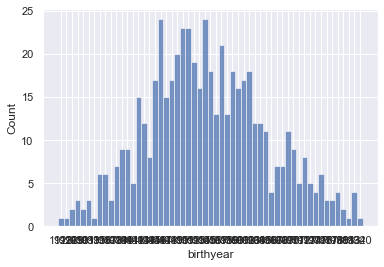

In [82]:
sns.histplot(congress_df['birthyear'])

__Transformation (3):__ Here, we are going to merge our congress_df and our crime_df, creating a new dataframe which shows crime rates by state and 113th Congress incumbents.

In [83]:
new_df = pd.merge(congress_df, crime_df, on='state')

In [84]:
new_df.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,birthyear,h-rate,fa-death rate,total fa-deaths
0,113,house,H000067,Ralph,M.,Hall,NaN,1923-05-03,TX,R,Yes,2013-01-03,89.7,1923,5,12.1,3353
1,113,house,J000174,Sam,Robert,Johnson,NaN,1930-10-11,TX,R,Yes,2013-01-03,82.2,1930,5,12.1,3353
2,113,house,J000126,Eddie,Bernice,Johnson,NaN,1935-12-03,TX,D,Yes,2013-01-03,77.1,1935,5,12.1,3353
3,113,house,H000636,Rubén,E.,Hinojosa,NaN,1940-08-20,TX,D,Yes,2013-01-03,72.4,1940,5,12.1,3353
4,113,house,C001051,John,R.,Carter,NaN,1941-11-06,TX,R,Yes,2013-01-03,71.2,1941,5,12.1,3353


Using our new dataframe, "new_df," we plot a line graph via Seaborn. This graph indicates states on the x-axis and homicide rates on the y-axis; line hues vary based on party of the Congressional incumbent.

<AxesSubplot:xlabel='state', ylabel='h-rate'>

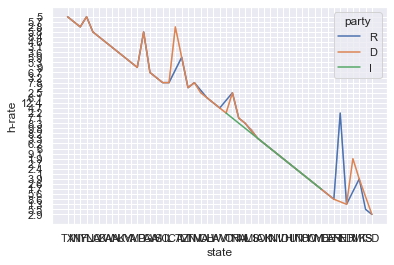

In [86]:
sns.lineplot(data=new_df, x='state', y='h-rate', hue='party')